In [ ]:
################# Step 1. Mounting the Google Drive to get the Dataset
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('My Drive/comma-separated-values-file-1.csv')
dataset.shape

(343003, 67)

In [ ]:
dataset.head()

,PARCEL CODE,RESIDENCE,PROPERTY ADDRESS,CITY,STATE,ZIP CODE,TAX CLASS,ASSESSMENT,BARNESVILLE PROPERTY TAX,BATTERY PARK PROPERTY TAX,BAY RESTORATION FUND,BROOKEVILLE PROPERTY TAX,CH CH SECTION 3 PROPERTY TAX,CH CH SECTION 5 PROPERTY TAX,CH CH TOWN PROPERTY TAX,CH CH VIEW PROPERTY TAX,CH CH VILLAGE PROPERTY TAX,County C-PACE Charge,COUNTY PROPERTY TAX,DBU ROAD,DEV DIST SPECIAL TAX - KV,DEV DIST SPECIAL TAX -WG,DRUMMOND PROPERTY TAX,FRIENDSHIP HTS PROPERTY TAX,GAITHERSBURG PROPERTY TAX,GAITHERSBURG STORMWATER FEE,GARRETT PARK PROPERTY TAX,GLEN ECHO PROPERTY TAX,KENSINGTON PROPERTY TAX,LAYTONSVILLE PROPERTY TAX,MARTINS ADDITION PROPERTY TAX,NORTH CH CH PROPERTY TAX,OAKMONT PROPERTY TAX,POOLESVILLE PROPERTY TAX,ROCKVILLE PROPERTY TAX,ROCKVILLE REFUSE CHARGE,ROCKVILLE STORMWATER MGMT FEE,SOLID WASTE CHARGE,SOMERSET PROPERTY TAX,STATE PROPERTY TAX,TAKOMA PARK PROPERTY TAX,TAKOMA PARK SPECIAL,WASHINGTON GROVE PROPERTY TAX,WATER QUAL PROTECT CHG (MFR),WATER QUAL PROTECT CHG (NR),WATER QUALITY PROTECT CHG (AG,WATER QUALITY PROTECT CHG (GO,WATER QUALITY PROTECT CHG (NP,WATER QUALITY PROTECT CHG (SF,WHITE FLINT SP TAX,WSSC CONNECTION FEE CHG,WSSC FRONT FOOT BENEFIT CHG,TOTAL,BLIND PARTIAL EXEMPTION,COUNTY HOMEOWNER'S CREDIT,COUNTY HOMESTEAD CREDIT,COUNTY PROPERTY TAX CREDIT,ELDERLY OR MILITARY RETIREE,MUNICIPAL HOMEOWNERS' CREDIT,MUNICIPAL HOMESTEAD CREDIT,MUNICIPAL SWIMCLUB,OTHER PARTIAL EXEMPTION,STATE HOMEOWNER'S CREDIT,STATE HOMESTEAD CREDIT,SWIMCLUB,TOTAL CREDITS,BILL TOTAL
0,18824,NOT A PRINCIPAL RESIDENCE,FREDERICK RD,NaN,MD,NaN,R042,358600,0,0,0,0,0,0,0,0,0,0,3551.94,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,401.63,0,0,0,0,0.0,0.0,0,0.0,227.00,0,0.0,0.0,4180.57,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,4180.57
1,579615,NOT A PRINCIPAL RESIDENCE,OAKMONT AVE,NaN,MD,NaN,R038,2300,0,0,0,0,0,0,0,0,0,0,22.78,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,2.58,0,0,0,0,0.0,0.0,0,0.0,0.00,0,0.0,0.0,25.36,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,25.36
2,522288,NOT A PRINCIPAL RESIDENCE,QUINCY ST,CHEVY CHASE,MD,20815.0,R023,10800,0,0,0,0,0,0,0,0,0,0,106.97,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0.0,0,12.10,0,0,0,0,0.0,0.0,0,0.0,37.46,0,0.0,0.0,157.07,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,157.07
3,524345,NOT A PRINCIPAL RESIDENCE,WISCONSIN AVE,NaN,MD,NaN,R079,600,0,0,0,0,0,0,0,0,0,0,6.01,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.67,0,0,0,0,0.0,0.0,0,0.0,0.00,0,0.0,0.0,6.68,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,6.68
4,525008,NOT A PRINCIPAL RESIDENCE,KENSINGTON PKY,CHEVY CHASE,MD,20815.0,R024,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.00,0,0,0,0,0.0,0.0,0,0.0,0.00,0,0.0,0.0,0.00,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0.00


In [ ]:
dataset.describe()

,PARCEL CODE,ZIP CODE,ASSESSMENT,BARNESVILLE PROPERTY TAX,BATTERY PARK PROPERTY TAX,BAY RESTORATION FUND,BROOKEVILLE PROPERTY TAX,CH CH SECTION 3 PROPERTY TAX,CH CH SECTION 5 PROPERTY TAX,CH CH TOWN PROPERTY TAX,CH CH VIEW PROPERTY TAX,CH CH VILLAGE PROPERTY TAX,County C-PACE Charge,COUNTY PROPERTY TAX,DBU ROAD,DEV DIST SPECIAL TAX - KV,DEV DIST SPECIAL TAX -WG,DRUMMOND PROPERTY TAX,FRIENDSHIP HTS PROPERTY TAX,GAITHERSBURG PROPERTY TAX,GAITHERSBURG STORMWATER FEE,GARRETT PARK PROPERTY TAX,GLEN ECHO PROPERTY TAX,KENSINGTON PROPERTY TAX,LAYTONSVILLE PROPERTY TAX,MARTINS ADDITION PROPERTY TAX,NORTH CH CH PROPERTY TAX,OAKMONT PROPERTY TAX,POOLESVILLE PROPERTY TAX,ROCKVILLE PROPERTY TAX,ROCKVILLE REFUSE CHARGE,ROCKVILLE STORMWATER MGMT FEE,SOLID WASTE CHARGE,SOMERSET PROPERTY TAX,STATE PROPERTY TAX,TAKOMA PARK PROPERTY TAX,TAKOMA PARK SPECIAL,WASHINGTON GROVE PROPERTY TAX,WATER QUAL PROTECT CHG (MFR),WATER QUAL PROTECT CHG (NR),WATER QUALITY PROTECT CHG (AG,WATER QUALITY PROTECT CHG (GO,WATER QUALITY PROTECT CHG (NP,WATER QUALITY PROTECT CHG (SF,WHITE FLINT SP TAX,WSSC CONNECTION FEE CHG,WSSC FRONT FOOT BENEFIT CHG,TOTAL,BLIND PARTIAL EXEMPTION,COUNTY HOMEOWNER'S CREDIT,COUNTY HOMESTEAD CREDIT,COUNTY PROPERTY TAX CREDIT,ELDERLY OR MILITARY RETIREE,MUNICIPAL HOMEOWNERS' CREDIT,MUNICIPAL HOMESTEAD CREDIT,MUNICIPAL SWIMCLUB,OTHER PARTIAL EXEMPTION,STATE HOMEOWNER'S CREDIT,STATE HOMESTEAD CREDIT,SWIMCLUB,TOTAL CREDITS,BILL TOTAL
count,3.430030e+05,323254.000000,3.430030e+05,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.0,343003.000000,343003.000000,343003.000000,343003.000000,3.430030e+05,343003.000000,343003.0,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,3.430030e+05,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.00000,343003.000000,3.430030e+05,343003.000000,343003.000000,343003.000000,3.430030e+05,3.430030e+05
mean,1.928443e+06,20868.693476,5.952568e+05,0.040376,0.316053,2.249193,0.118337,0.182867,0.0,0.380860,0.189503,2.696475,1.036603,5.809376e+03,0.087585,0.0,3.387813,0.103856,1.857855,88.730416,16.750218,1.727746,0.407617,2.449807,0.393228,0.053367,0.234785,0.068580,4.911342,123.301572,18.608741,13.924849,306.795594,1.732787,665.073844,39.950324,2.082562,0.732072,6.099652,36.309852,0.445146,4.376769,2.921541,76.676143,6.639210,5.729895,8.951259,7.258097e+03,-0.094574,-6.404009,-2.246190,-503.403640,-15.903551,-0.477798,-0.10027,-0.018143,-2.725007e+01,-9.328792,-0.254336,-2.435486,-5.679171e+02,6.690180e+03
std,1.111819e+06,60.294635,2.987538e+06,3.209275,15.969257,11.397065,9.969901,6.987460,0.0,7.920959,6.585309,65.573163,282.981057,2.930652e+04,12.090183,0.0,55.641414,10.190589,207.199355,2348.647058,478.543338,53.969930,23.681705,95.701956,18.602726,1.855983,10.289758,5.225127,72.457855,2263.990999,90.527072,313.345925,1983.122513,52.060714,3346.184100,616.268266,59.184010,29.810918,42.572713,648.644953,8.725829,647.447874,72.105119,86.926922,633.166117,61.302246,126.639649,3.559769e+04,4.033290,101.524991,59.099754,308.008123,110.440151,17.720758,6.81199,9.727243,4.111418e+03,145.338468,6.687077,240.267895,4.135858e+03,3.508050e+04
min,1.100000e+01,20166.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00

In [ ]:
a,b = dataset.shape######

print("Total Rows of the Dataset is : ", a)#####
print("Total Features/columns of the Dataset is : ", b)#####

print(dataset.dtypes)

Total Rows of the Dataset is :  343003
Total Features/columns of the Dataset is :  67
PARCEL CODE                   int64
RESIDENCE                    object
PROPERTY ADDRESS             object
CITY                         object
STATE                        object
                             ...   
STATE HOMEOWNER'S CREDIT    float64
STATE HOMESTEAD CREDIT        int64
SWIMCLUB                      int64
TOTAL CREDITS               float64
BILL TOTAL                  float64
Length: 67, dtype: object


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343003 entries, 0 to 343002
Data columns (total 67 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PARCEL CODE                    343003 non-null  int64  
 1   RESIDENCE                      343003 non-null  object 
 2   PROPERTY ADDRESS               342987 non-null  object 
 3   CITY                           324744 non-null  object 
 4   STATE                          343003 non-null  object 
 5   ZIP CODE                       323254 non-null  float64
 6   TAX CLASS                      343003 non-null  object 
 7   ASSESSMENT                     343003 non-null  int64  
 8   BARNESVILLE PROPERTY TAX       343003 non-null  int64  
 9   BATTERY PARK PROPERTY TAX      343003 non-null  int64  
 10  BAY RESTORATION FUND           343003 non-null  int64  
 11  BROOKEVILLE PROPERTY TAX       343003 non-null  int64  
 12  CH CH SECTION 3 PROPERTY TAX  

In [ ]:
data = dataset
print(data.shape)
data = data.dropna()
print(data.shape)
data["counter"] = [1]*len(data)

ans1 = data[["counter","CITY","TAX CLASS"]].groupby(["CITY","TAX CLASS"]).count().sort_values("counter",ascending=False).reset_index().drop_duplicates("CITY")
ans2 = data.CITY[np.argmax(data.ASSESSMENT)]
ans3 = data.CITY[np.argmax(data['COUNTY PROPERTY TAX'])]

print('Hypothesis 1: Which is the most commonly used tax class for different cities?', ans1)
print('Hypothesis 2: City with maximum assessment rate?', ans2)
print('Hypothesis 3: City with County paying the highest property tax?', ans3)


(343003, 67)
(323211, 67)
Hypothesis 1: Which is the most commonly used tax class for different cities?                  CITY TAX CLASS  counter
0       SILVER SPRING      R038    44549
2            BETHESDA      R038    26722
3          GERMANTOWN      R042    25007
4        GAITHERSBURG      R042    20713
5           ROCKVILLE      R050    18793
..                ...       ...      ...
389  MONTGOMERY VILLL      R042        1
390  MONTGOMERY WILLA      R042        1
391  MONTGOMERYY VILL      R042        1
392  MONTOMGERY VILLA      R042        1
393             20886      R042        1

[238 rows x 3 columns]
Hypothesis 2: City with maximum assessment rate? GAITHERSBURG
Hypothesis 3: City with County paying the highest property tax? GAITHERSBURG


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
ans1['TAX CLASS'].value_counts()

R042    142
R053     28
R038     22
R025      9
R050      7
R074      4
R016      4
R057      3
R026      3
R064      3
R044      2
R049      2
R079      1
R024      1
R048      1
R045      1
R068      1
R076      1
R058      1
R030      1
R027      1
Name: TAX CLASS, dtype: int64

In [ ]:
data['COUNTY PROPERTY TAX'].describe()

count    3.232110e+05
mean     5.877414e+03
std      2.758361e+04
min      0.000000e+00
25%      2.719920e+03
50%      4.024720e+03
75%      6.070780e+03
max      5.684348e+06
Name: COUNTY PROPERTY TAX, dtype: float64

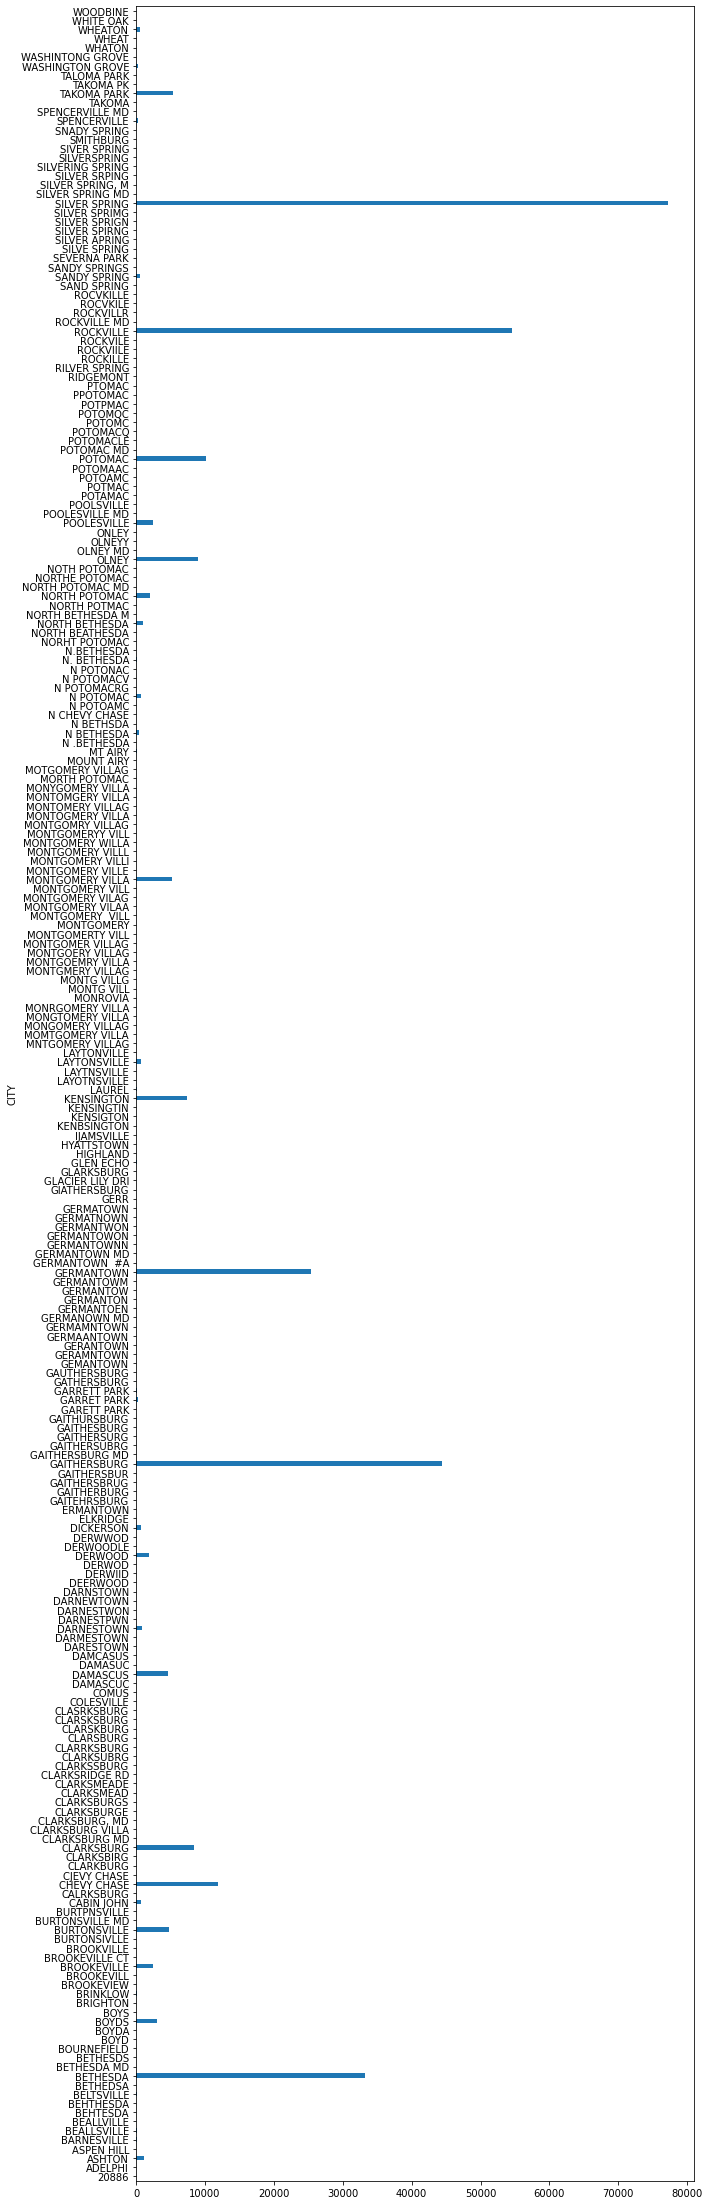

In [ ]:
data.groupby("CITY")["counter"].count().plot(kind="barh",figsize=(10, 40))

In [ ]:
dataset.describe()

,PARCEL CODE,RESIDENCE,PROPERTY ADDRESS,CITY,STATE,ZIP CODE,TAX CLASS,ASSESSMENT,BARNESVILLE PROPERTY TAX,BATTERY PARK PROPERTY TAX,BAY RESTORATION FUND,BROOKEVILLE PROPERTY TAX,CH CH SECTION 3 PROPERTY TAX,CH CH SECTION 5 PROPERTY TAX,CH CH TOWN PROPERTY TAX,CH CH VIEW PROPERTY TAX,CH CH VILLAGE PROPERTY TAX,County C-PACE Charge,COUNTY PROPERTY TAX,DBU ROAD,DEV DIST SPECIAL TAX - KV,DEV DIST SPECIAL TAX -WG,DRUMMOND PROPERTY TAX,FRIENDSHIP HTS PROPERTY TAX,GAITHERSBURG PROPERTY TAX,GAITHERSBURG STORMWATER FEE,GARRETT PARK PROPERTY TAX,GLEN ECHO PROPERTY TAX,KENSINGTON PROPERTY TAX,LAYTONSVILLE PROPERTY TAX,MARTINS ADDITION PROPERTY TAX,NORTH CH CH PROPERTY TAX,OAKMONT PROPERTY TAX,POOLESVILLE PROPERTY TAX,ROCKVILLE PROPERTY TAX,ROCKVILLE REFUSE CHARGE,ROCKVILLE STORMWATER MGMT FEE,SOLID WASTE CHARGE,SOMERSET PROPERTY TAX,STATE PROPERTY TAX,TAKOMA PARK PROPERTY TAX,TAKOMA PARK SPECIAL,WASHINGTON GROVE PROPERTY TAX,WATER QUAL PROTECT CHG (MFR),WATER QUAL PROTECT CHG (NR),WATER QUALITY PROTECT CHG (AG,WATER QUALITY PROTECT CHG (GO,WATER QUALITY PROTECT CHG (NP,WATER QUALITY PROTECT CHG (SF,WHITE FLINT SP TAX,WSSC CONNECTION FEE CHG,WSSC FRONT FOOT BENEFIT CHG,TOTAL,BLIND PARTIAL EXEMPTION,COUNTY HOMEOWNER'S CREDIT,COUNTY HOMESTEAD CREDIT,COUNTY PROPERTY TAX CREDIT,ELDERLY OR MILITARY RETIREE,MUNICIPAL HOMEOWNERS' CREDIT,MUNICIPAL HOMESTEAD CREDIT,MUNICIPAL SWIMCLUB,OTHER PARTIAL EXEMPTION,STATE HOMEOWNER'S CREDIT,STATE HOMESTEAD CREDIT,SWIMCLUB,TOTAL CREDITS,BILL TOTAL
count,3.430030e+05,343003.000000,343003.000000,343003.000000,343003.0,323254.000000,343003.000000,3.430030e+05,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.0,343003.000000,343003.000000,343003.000000,343003.000000,3.430030e+05,343003.000000,343003.0,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,3.430030e+05,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.000000,343003.00000,343003.000000,3.430030e+05,343003.000000,343003.000000,343003.000000,3.430030e+05,3.430030e+05
mean,1.928443e+06,0.762737,165004.824899,142.098122,0.0,20868.693476,23.940021,5.952568e+05,0.040376,0.316053,2.249193,0.118337,0.182867,0.0,0.380860,0.189503,2.696475,1.036603,5.809376e+03,0.087585,0.0,3.387813,0.103856,1.857855,88.730416,16.750218,1.727746,0.407617,2.449807,0.393228,0.053367,0.234785,0.068580,4.911342,123.301572,18.608741,13.924849,306.795594,1.732787,665.073844,39.950324,2.082562,0.732072,6.099652,36.309852,0.445146,4.376769,2.921541,76.676143,6.639210,5.729895,8.951259,7.258097e+03,-0.094574,-6.404009,-2.246190,-503.403640,-15.903551,-0.477798,-0.10027,-0.018143,-2.725007e+01,-9.328792,-0.254336,-2.435486,-5.679171e+02,6.690180e+03
std,1.111819e+06,0.425406,94858.323078,80.488197,0.0,60.294635,5.599993,2.987538e+06,3.209275,15.969257,11.397065,9.969901,6.987460,0.0,7.920959,6.585309,65.573163,282.981057,2.930652e+04,12.090183,0.0,55.641414,10.190589,207.199355,2348.647058,478.543338,53.969930,23.681705,95.701956,18.602726,1.855983,10.289758,5.225127,72.457855,2263.990999,90.527072,313.345925,1983.122513,52.060714,3346.184100,616.268266,59.184010,29.810918,42.572713,648.644953,8.725829,647.447874,72.105119,86.926922,633.166117,61.302246,126.639649,3.559769e+04,4.033290,101.524991,59.099754,308.008123,110.440151,17.720758,6.81199,9.727243,4.111418e+03,145.338468,6.687077,240.267895,4.135858e+03,3.508050e+04
min,1.100000e+01,0.000000,0.000000,0.000000,0.0,20166.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
dataset.columns.values

array(['PARCEL CODE', 'RESIDENCE', 'PROPERTY ADDRESS', 'CITY', 'STATE',
       'ZIP CODE', 'TAX CLASS', 'ASSESSMENT', 'BARNESVILLE PROPERTY TAX',
       'BATTERY PARK PROPERTY TAX', 'BAY RESTORATION FUND',
       'BROOKEVILLE PROPERTY TAX', 'CH CH SECTION 3 PROPERTY TAX',
       'CH CH SECTION 5 PROPERTY TAX', 'CH CH TOWN PROPERTY TAX',
       'CH CH VIEW PROPERTY TAX', 'CH CH VILLAGE PROPERTY TAX',
       'County C-PACE Charge', 'COUNTY PROPERTY TAX', 'DBU ROAD',
       'DEV DIST SPECIAL TAX - KV', 'DEV DIST SPECIAL TAX -WG',
       'DRUMMOND PROPERTY TAX', 'FRIENDSHIP HTS PROPERTY TAX',
       'GAITHERSBURG PROPERTY TAX', 'GAITHERSBURG STORMWATER FEE',
       'GARRETT PARK PROPERTY TAX', 'GLEN ECHO PROPERTY TAX',
       'KENSINGTON PROPERTY TAX', 'LAYTONSVILLE PROPERTY TAX',
       'MARTINS ADDITION PROPERTY TAX', 'NORTH CH CH PROPERTY TAX',
       'OAKMONT PROPERTY TAX', 'POOLESVILLE PROPERTY TAX',
       'ROCKVILLE PROPERTY TAX', 'ROCKVILLE REFUSE CHARGE',
       'ROCKVILLE STORMWA

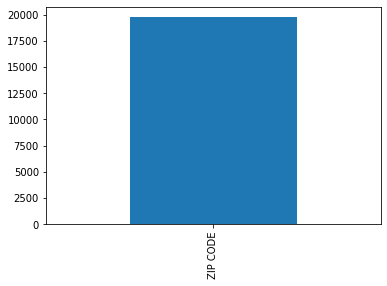

In [ ]:
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
dataset.isnull().sum()

PARCEL CODE                 0
RESIDENCE                   0
PROPERTY ADDRESS            0
CITY                        0
STATE                       0
                           ..
STATE HOMEOWNER'S CREDIT    0
STATE HOMESTEAD CREDIT      0
SWIMCLUB                    0
TOTAL CREDITS               0
BILL TOTAL                  0
Length: 67, dtype: int64

In [ ]:
list(dataset.columns.values)

['PARCEL CODE',
 'RESIDENCE',
 'PROPERTY ADDRESS',
 'CITY',
 'STATE',
 'ZIP CODE',
 'TAX CLASS',
 'ASSESSMENT',
 'BARNESVILLE PROPERTY TAX',
 'BATTERY PARK PROPERTY TAX',
 'BAY RESTORATION FUND',
 'BROOKEVILLE PROPERTY TAX',
 'CH CH SECTION 3 PROPERTY TAX',
 'CH CH SECTION 5 PROPERTY TAX',
 'CH CH TOWN PROPERTY TAX',
 'CH CH VIEW PROPERTY TAX',
 'CH CH VILLAGE PROPERTY TAX',
 'County C-PACE Charge',
 'COUNTY PROPERTY TAX',
 'DBU ROAD',
 'DEV DIST SPECIAL TAX - KV',
 'DEV DIST SPECIAL TAX -WG',
 'DRUMMOND PROPERTY TAX',
 'FRIENDSHIP HTS PROPERTY TAX',
 'GAITHERSBURG PROPERTY TAX',
 'GAITHERSBURG STORMWATER FEE',
 'GARRETT PARK PROPERTY TAX',
 'GLEN ECHO PROPERTY TAX',
 'KENSINGTON PROPERTY TAX',
 'LAYTONSVILLE PROPERTY TAX',
 'MARTINS ADDITION PROPERTY TAX',
 'NORTH CH CH PROPERTY TAX',
 'OAKMONT PROPERTY TAX',
 'POOLESVILLE PROPERTY TAX',
 'ROCKVILLE PROPERTY TAX',
 'ROCKVILLE REFUSE CHARGE',
 'ROCKVILLE STORMWATER MGMT FEE',
 'SOLID WASTE CHARGE',
 'SOMERSET PROPERTY TAX',
 'STATE PRO

In [ ]:
len(list(dataset.columns.values))

67

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
quantitative = [f for f in dataset.columns if dataset.dtypes[f] != 'object']
quantitative.remove('BILL TOTAL')
qualitative = [f for f in dataset.columns if dataset.dtypes[f] == 'object']

In [ ]:
print('Numerical: ', quantitative)
print('Categorical:', qualitative)

Numerical:  ['PARCEL CODE', 'ZIP CODE', 'ASSESSMENT', 'BARNESVILLE PROPERTY TAX', 'BATTERY PARK PROPERTY TAX', 'BAY RESTORATION FUND', 'BROOKEVILLE PROPERTY TAX', 'CH CH SECTION 3 PROPERTY TAX', 'CH CH SECTION 5 PROPERTY TAX', 'CH CH TOWN PROPERTY TAX', 'CH CH VIEW PROPERTY TAX', 'CH CH VILLAGE PROPERTY TAX', 'County C-PACE Charge', 'COUNTY PROPERTY TAX', 'DBU ROAD', 'DEV DIST SPECIAL TAX - KV', 'DEV DIST SPECIAL TAX -WG', 'DRUMMOND PROPERTY TAX', 'FRIENDSHIP HTS PROPERTY TAX', 'GAITHERSBURG PROPERTY TAX', 'GAITHERSBURG STORMWATER FEE', 'GARRETT PARK PROPERTY TAX', 'GLEN ECHO PROPERTY TAX', 'KENSINGTON PROPERTY TAX', 'LAYTONSVILLE PROPERTY TAX', 'MARTINS ADDITION PROPERTY TAX', 'NORTH CH CH PROPERTY TAX', 'OAKMONT PROPERTY TAX', 'POOLESVILLE PROPERTY TAX', 'ROCKVILLE PROPERTY TAX', 'ROCKVILLE REFUSE CHARGE', 'ROCKVILLE STORMWATER MGMT FEE', 'SOLID WASTE CHARGE', 'SOMERSET PROPERTY TAX', 'STATE PROPERTY TAX', 'TAKOMA PARK PROPERTY TAX', 'TAKOMA PARK SPECIAL', 'WASHINGTON GROVE PROPERTY 

In [ ]:
quantitative.remove('PARCEL CODE')
quantitative.remove('ZIP CODE')

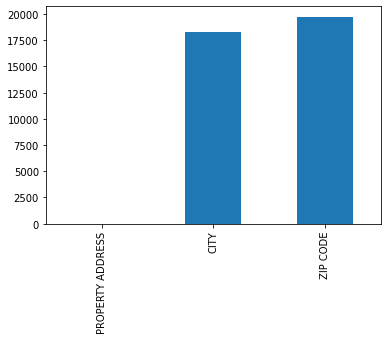

In [ ]:
missing = dataset.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

Text(0.5, 0, 'BILL TOTAL')

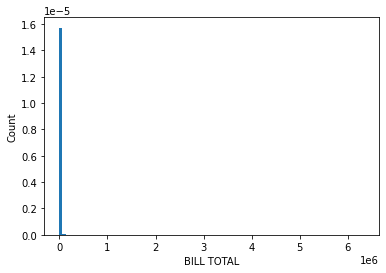

In [ ]:
import matplotlib.pyplot as plt
######
%matplotlib inline

# Plot Data density
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

#plotting the price 
#resizeplot(10,6)
#sns.histplot(y,kde=True,bins=50)
plt.hist(dataset['BILL TOTAL'].values, density=True, bins=100)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('BILL TOTAL')
##### Form the below cureve or the distribution og the price feature we cn find that the data is right skewed and has a long tail. Those can be thought of that there are outliers.
##### We can go for the outliers treatment. Outlier treatment formula: Mean - 3*standadrd deviation (https://link.springer.com/chapter/10.1007/978-981-10-8681-6_17)
##### Since the data is not following the Normal Distribution
##### Will be tken care in the Future

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

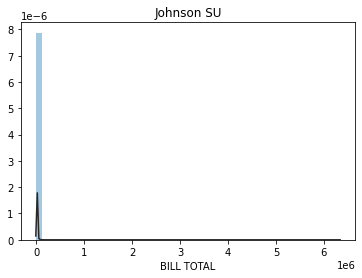

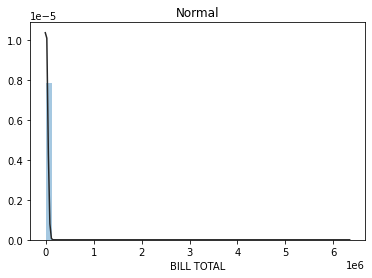

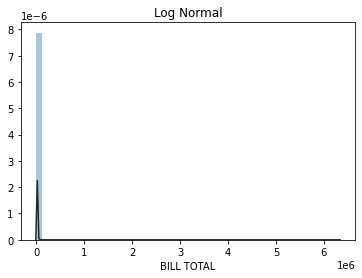

In [ ]:
import scipy.stats as st
y = dataset['BILL TOTAL']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [ ]:
dataset['BILL TOTAL'].describe()

count    3.430030e+05
mean     6.690180e+03
std      3.508050e+04
min      0.000000e+00
25%      2.602630e+03
50%      4.293830e+03
75%      6.872290e+03
max      6.330798e+06
Name: BILL TOTAL, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

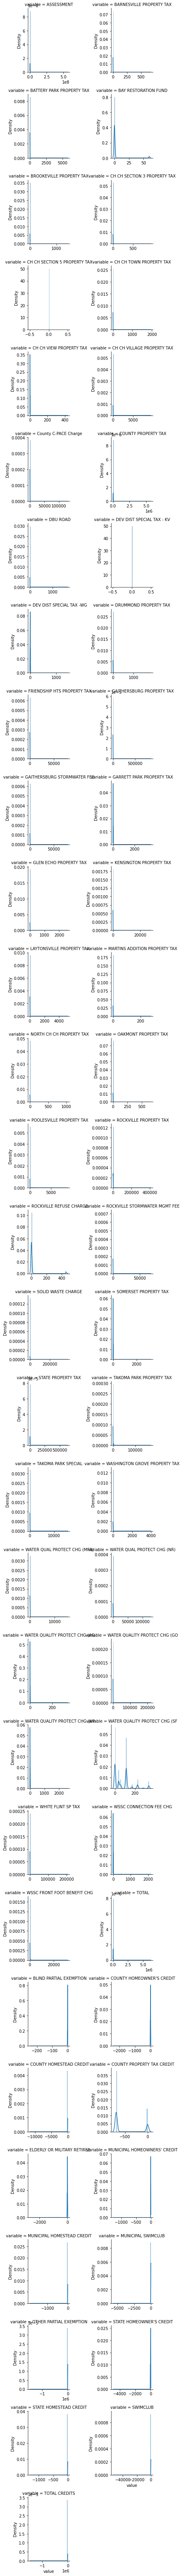

In [ ]:
f = pd.melt(dataset, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
for c in qualitative:
    dataset[c] = dataset[c].astype('category')
    if dataset[c].isnull().any():
        dataset[c] = dataset[c].cat.add_categories(['MISSING'])
        dataset[c] = dataset[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(dataset, id_vars=['BILL TOTAL'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "BILL TOTAL")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['BILL TOTAL'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(dataset)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [ ]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['BILL TOTAL'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qualitative
spearman(dataset, features)

In [ ]:
plt.figure(1)
corr = dataset[quantitative+['BILL TOTAL']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = dataset[qualitative+['BILL TOTAL']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qualitative)+1]), index=quantitative+['BILL TOTAL'], columns=qualitative+['BILL TOTAL'])

sns.heatmap(corr)

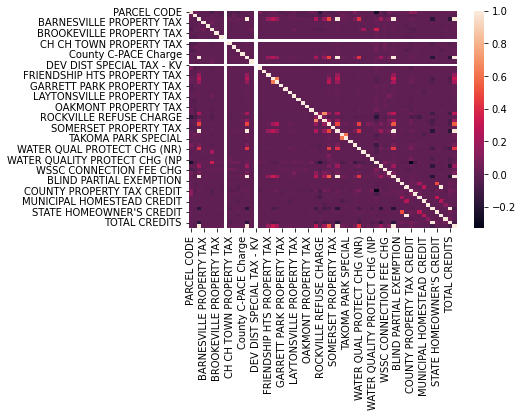

In [ ]:
corr = dataset.corr()
sns.heatmap(corr)


In [ ]:
#### Correlation Plot
#### The correlation factor talks about the how the feature are behaving with each other. i.e how proportional it is
#### Values are +ive, -ive: +ive mean positively correlated and -ve means negative correlated. 0: is not correlated. The features near to zero correlation means they are not correlated
#### inter correlation means with in th each featues of the X how they are correlated. two features X1 and X2 is they have high correlation values, one should be deleted.

#resizeplot(16,7
#sns.heatmap(df_input.corr(),annot=True)

corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,PARCEL CODE,ZIP CODE,ASSESSMENT,BARNESVILLE PROPERTY TAX,BATTERY PARK PROPERTY TAX,BAY RESTORATION FUND,BROOKEVILLE PROPERTY TAX,CH CH SECTION 3 PROPERTY TAX,CH CH SECTION 5 PROPERTY TAX,CH CH TOWN PROPERTY TAX,CH CH VIEW PROPERTY TAX,CH CH VILLAGE PROPERTY TAX,County C-PACE Charge,COUNTY PROPERTY TAX,DBU ROAD,DEV DIST SPECIAL TAX - KV,DEV DIST SPECIAL TAX -WG,DRUMMOND PROPERTY TAX,FRIENDSHIP HTS PROPERTY TAX,GAITHERSBURG PROPERTY TAX,GAITHERSBURG STORMWATER FEE,GARRETT PARK PROPERTY TAX,GLEN ECHO PROPERTY TAX,KENSINGTON PROPERTY TAX,LAYTONSVILLE PROPERTY TAX,MARTINS ADDITION PROPERTY TAX,NORTH CH CH PROPERTY TAX,OAKMONT PROPERTY TAX,POOLESVILLE PROPERTY TAX,ROCKVILLE PROPERTY TAX,ROCKVILLE REFUSE CHARGE,ROCKVILLE STORMWATER MGMT FEE,SOLID WASTE CHARGE,SOMERSET PROPERTY TAX,STATE PROPERTY TAX,TAKOMA PARK PROPERTY TAX,TAKOMA PARK SPECIAL,WASHINGTON GROVE PROPERTY TAX,WATER QUAL PROTECT CHG (MFR),WATER QUAL PROTECT CHG (NR),WATER QUALITY PROTECT CHG (AG,WATER QUALITY PROTECT CHG (GO,WATER QUALITY PROTECT CHG (NP,WATER QUALITY PROTECT CHG (SF,WHITE FLINT SP TAX,WSSC CONNECTION FEE CHG,WSSC FRONT FOOT BENEFIT CHG,TOTAL,BLIND PARTIAL EXEMPTION,COUNTY HOMEOWNER'S CREDIT,COUNTY HOMESTEAD CREDIT,COUNTY PROPERTY TAX CREDIT,ELDERLY OR MILITARY RETIREE,MUNICIPAL HOMEOWNERS' CREDIT,MUNICIPAL HOMESTEAD CREDIT,MUNICIPAL SWIMCLUB,OTHER PARTIAL EXEMPTION,STATE HOMEOWNER'S CREDIT,STATE HOMESTEAD CREDIT,SWIMCLUB,TOTAL CREDITS,BILL TOTAL
PARCEL CODE,1.000000,0.042383,0.006036,-0.009654,-0.019145,-0.065809,-0.001006,-0.027280,nan,-0.052966,-0.019701,-0.045858,0.000506,0.005268,-0.005886,nan,0.075491,-0.010541,-0.001851,0.028090,0.016538,-0.042578,-0.009578,-0.011466,0.013545,-0.026931,-0.019057,-0.010262,0.032862,0.003305,-0.149314,-0.007177,-0.019195,-0.038418,0.006033,0.009006,0.007292,-0.012889,0.083386,0.009891,-0.010992,-0.007771,0.004093,-0.249570,0.007857,-0.055532,0.062669,0.005515,0.006718,0.018272,0.009750,0.127019,0.126828,0.016964,0.008883,-0.001435,-0.005346,0.020942,0.009858,0.007349,0.009388,0.006703
ZIP CODE,0.042383,1.000000,-0.028280,-0.006394,-0.018358,0.018390,-0.007102,-0.023970,nan,-0.044109,0.030796,-0.037722,-0.002595,-0.028071,-0.001819,nan,-0.027288,-0.009349,-0.007947,0.007883,0.005430,0.014854,-0.016381,0.011472,0.004625,-0.026377,-0.020930,-0.011619,-0.037259,-0.017838,-0.062075,-0.013290,0.003177,-0.030497,-0.028244,0.043376,0.022517,0.004641,0.009973,0.002383,0.007912,-0.000866,0.002166,-0.028734,-0.001945,-0.038097,-0.008770,-0.026323,-0.002448,-0.009352,0.001148,-0.020108,-0.012339,0.005416,-0.006074,0.000516,0.000461,-0.006813,0.001171,0.001666,-0.001613,-0.027003
ASSESSMENT,0.006036,-0.028280,1.000000,-0.000417,0.009424,0.009604,-0.000140,0.006488,nan,0.017537,0.005295,0.020249,0.010185,0.999155,0.001207,nan,-0.000148,0.005076,0.171613,0.292957,0.183444,0.002464,0.001857,0.019332,0.002710,0.006704,0.003111,0.001758,0.000175,0.247994,-0.004841,0.170089,0.480369,0.010813,0.999946,0.025465,0.016585,-0.000866,0.070315,0.422857,0.001593,-0.001347,-0.000191,0.031122,0.190077,0.023770,0.071528,0.995575,0.001102,0.003819,-0.005779,0.029429,0.005986,0.001528,-0.001330,-0.000743,-0.184117,0.004499,-0.005776,-0.006114,-0.180869,0.988929
BARNESVILLE PROPERTY TAX,-0.009654,-0.006394,-0.000417,1.000000,-0.000249,0.056911,-0.000149,-0.000329,nan,-0.000605,-0.000362,-0.000517,-0.000046,-0.000539,-0.000091,nan,-0.000766,-0.000128,-0.000113,-0.000475,-0.000440,-0.000403,-0.000217,-0.000322,-0.000266,-0.000362,-0.000287,-0.000165,-0.000853,-0.000685,-0.002586,-0.000559,-0.001247,-0.000419,-0.000411,-0.000816,-0.000443,-0.000309,-0.001803,0.000253,0.015299,-0.000085,-0.000510,0.019355,-0.000132,-0.001176,-0.000889,-0.000515,0.000295,0.000794,0.000478,-0.004324,-0.003760,0.000339,0.000185,0.000023,0.000083,0.000808,0.000479,0.000128,-0.000275,-0.000555
BATTERY PARK PROPERTY TAX,-0.019145,-0.018358,0.009424,-0.000249,1.000000,-0.003906,-0.000235,-0.000518,nan,-0.000952,-0.000570,-0.000814,-0.000072,0.009643,-0.000143,nan,-0.001205,-

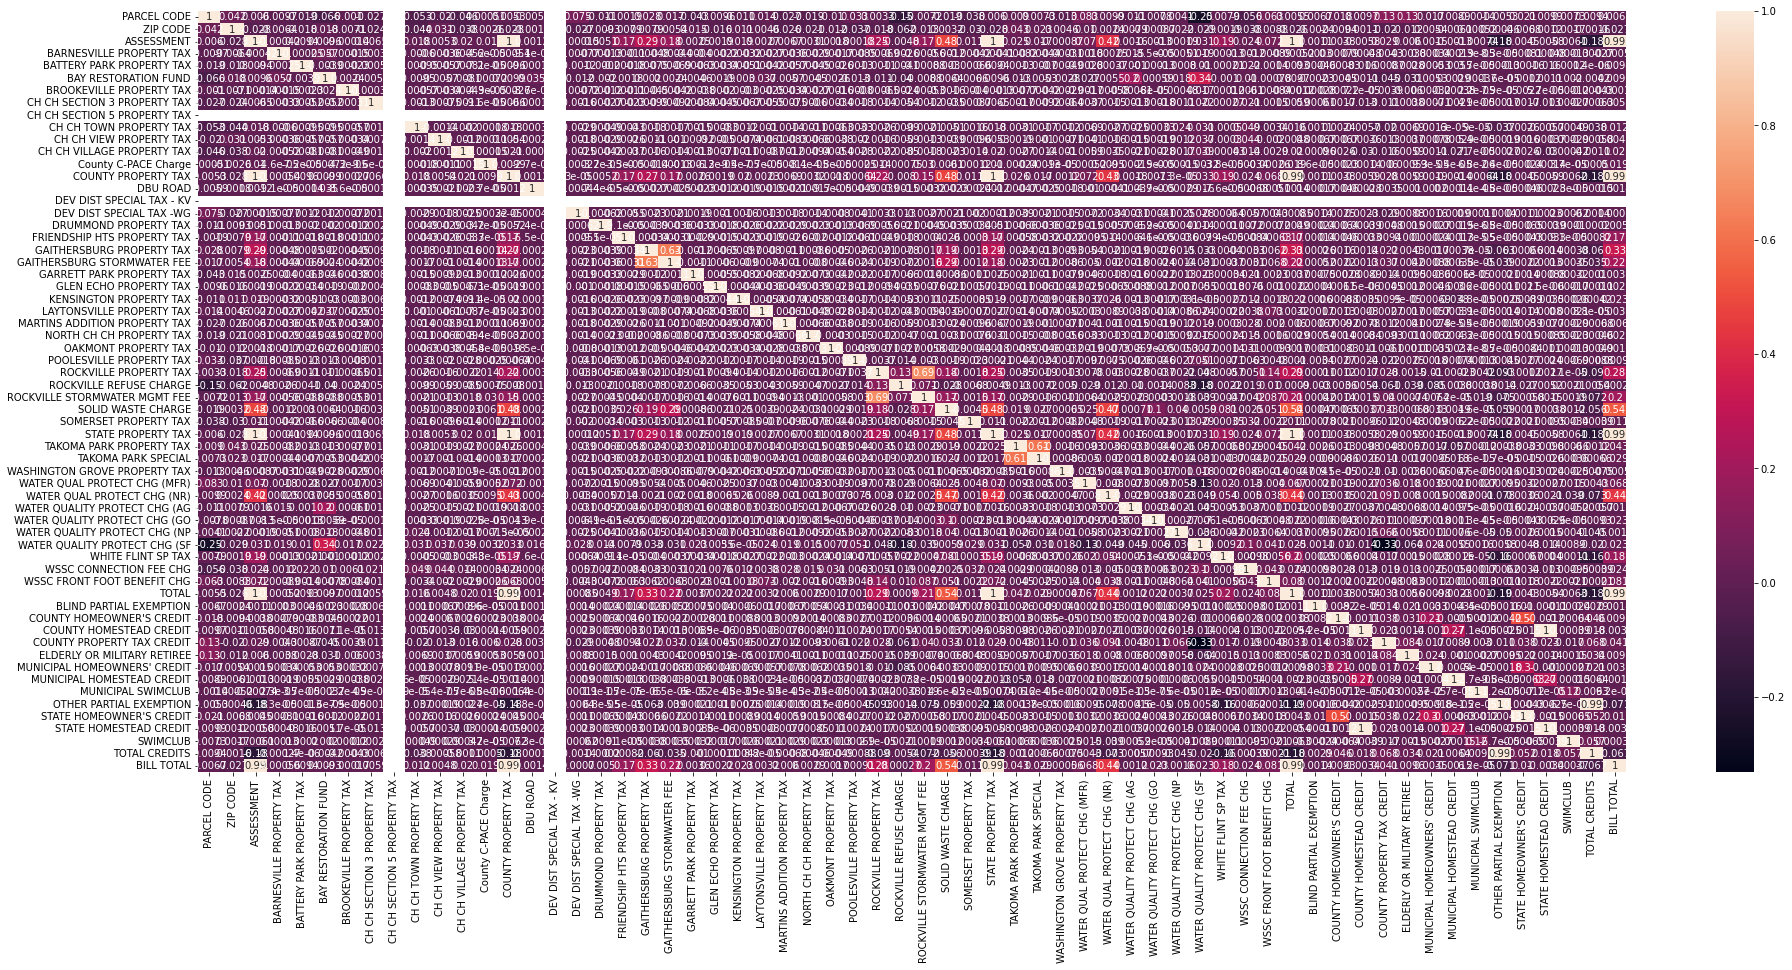

In [ ]:
resizeplot(32,14)
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(dataset, id_vars=['BILL TOTAL'], value_vars=quantitative+qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "BILL TOTAL")

In [ ]:
features = quantitative + qualitative
from sklearn.preprocessing import LabelEncoder
#dataset[features].fillna(0.)
le = LabelEncoder()
for num in qualitative:
  dataset[num] = le.fit_transform(dataset[num])
X = dataset[features].fillna(0.).values

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

print(np.sum(pca.explained_variance_ratio_))

0.6774353995053458


In [ ]:
qualitative

In [ ]:
pc

array([[-0.12869174, -1.75787924,  0.43125895, ...,  0.18333033,
        -0.26692871, -0.08204502],
       [-0.33711637, -2.74388807,  0.7093571 , ..., -0.04431023,
        -0.17282831, -0.04422265],
       [-0.3383135 , -2.23829029,  0.62153271, ..., -0.0502953 ,
        -0.05732361, -0.06898144],
       ...,
       [-0.25618112, -2.7690407 ,  0.70995495, ..., -0.06367539,
        -0.1737523 , -0.05081419],
       [ 0.05167738, -1.24518364,  0.40741202, ...,  5.1677971 ,
        -4.11882268, -0.11437043],
       [-0.27645468, -2.43087066,  0.57699386, ...,  0.10899765,
         0.02129575, -0.00659116]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


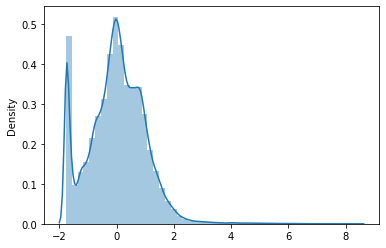

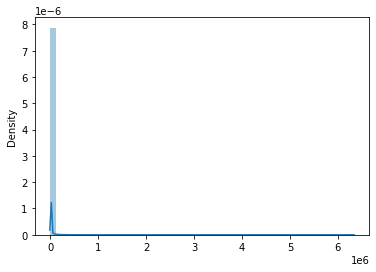

In [ ]:
y = dataset['BILL TOTAL'].values
def johnson(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon

yt, g, et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)

In [ ]:
dataset.head()

,PARCEL CODE,RESIDENCE,PROPERTY ADDRESS,CITY,STATE,ZIP CODE,TAX CLASS,ASSESSMENT,BARNESVILLE PROPERTY TAX,BATTERY PARK PROPERTY TAX,BAY RESTORATION FUND,BROOKEVILLE PROPERTY TAX,CH CH SECTION 3 PROPERTY TAX,CH CH SECTION 5 PROPERTY TAX,CH CH TOWN PROPERTY TAX,CH CH VIEW PROPERTY TAX,CH CH VILLAGE PROPERTY TAX,County C-PACE Charge,COUNTY PROPERTY TAX,DBU ROAD,DEV DIST SPECIAL TAX - KV,DEV DIST SPECIAL TAX -WG,DRUMMOND PROPERTY TAX,FRIENDSHIP HTS PROPERTY TAX,GAITHERSBURG PROPERTY TAX,GAITHERSBURG STORMWATER FEE,GARRETT PARK PROPERTY TAX,GLEN ECHO PROPERTY TAX,KENSINGTON PROPERTY TAX,LAYTONSVILLE PROPERTY TAX,MARTINS ADDITION PROPERTY TAX,NORTH CH CH PROPERTY TAX,OAKMONT PROPERTY TAX,POOLESVILLE PROPERTY TAX,ROCKVILLE PROPERTY TAX,ROCKVILLE REFUSE CHARGE,ROCKVILLE STORMWATER MGMT FEE,SOLID WASTE CHARGE,SOMERSET PROPERTY TAX,STATE PROPERTY TAX,TAKOMA PARK PROPERTY TAX,TAKOMA PARK SPECIAL,WASHINGTON GROVE PROPERTY TAX,WATER QUAL PROTECT CHG (MFR),WATER QUAL PROTECT CHG (NR),WATER QUALITY PROTECT CHG (AG,WATER QUALITY PROTECT CHG (GO,WATER QUALITY PROTECT CHG (NP,WATER QUALITY PROTECT CHG (SF,WHITE FLINT SP TAX,WSSC CONNECTION FEE CHG,WSSC FRONT FOOT BENEFIT CHG,TOTAL,BLIND PARTIAL EXEMPTION,COUNTY HOMEOWNER'S CREDIT,COUNTY HOMESTEAD CREDIT,COUNTY PROPERTY TAX CREDIT,ELDERLY OR MILITARY RETIREE,MUNICIPAL HOMEOWNERS' CREDIT,MUNICIPAL HOMESTEAD CREDIT,MUNICIPAL SWIMCLUB,OTHER PARTIAL EXEMPTION,STATE HOMEOWNER'S CREDIT,STATE HOMESTEAD CREDIT,SWIMCLUB,TOTAL CREDITS,BILL TOTAL
0,18824,0,312908,241,0,NaN,24,358600,0,0,0,0,0,0,0,0,0,0,3551.94,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,401.63,0,0,0,0,0.0,0.0,0,0.0,227.00,0,0.0,0.0,4180.57,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,4180.57
1,579615,0,314515,241,0,NaN,22,2300,0,0,0,0,0,0,0,0,0,0,22.78,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,2.58,0,0,0,0,0.0,0.0,0,0.0,0.00,0,0.0,0.0,25.36,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,25.36
2,522288,0,314955,33,0,20815.0,12,10800,0,0,0,0,0,0,0,0,0,0,106.97,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0.0,0,12.10,0,0,0,0,0.0,0.0,0,0.0,37.46,0,0.0,0.0,157.07,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,157.07
3,524345,0,316422,241,0,NaN,42,600,0,0,0,0,0,0,0,0,0,0,6.01,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.67,0,0,0,0,0.0,0.0,0,0.0,0.00,0,0.0,0.0,6.68,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,6.68
4,525008,0,313687,33,0,20815.0,13,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0.00,0,0,0,0,0.0,0.0,0,0.0,0.00,0,0.0,0.0,0.00,0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0.0,0.00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb

X = pc
Y = y

def rmse(y_actual, y_predicted):
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    return rms

#%% Train Test Split for the better Model Performance

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=42)

################################# XGBoost Regressor
eval_set = [(testX,testY)]
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xgb_model.fit(trainX, trainY,eval_set=eval_set,verbose=True,early_stopping_rounds=50)

zpred = xgb_model.predict(testX)

print("RMSE for the test part is : ",rmse(testY,zpred))

[20:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:33520.1
Will train until validation_0-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:31906.6
[2]	validation_0-rmse:30194
[3]	validation_0-rmse:28678.9
[4]	validation_0-rmse:27294.6
[5]	validation_0-rmse:26200.3
[6]	validation_0-rmse:25170.4
[7]	validation_0-rmse:24360.3
[8]	validation_0-rmse:23512.7
[9]	validation_0-rmse:22785.3
[10]	validation_0-rmse:21656.7
[11]	validation_0-rmse:20667.6
[12]	validation_0-rmse:19863.7
[13]	validation_0-rmse:19194
[14]	validation_0-rmse:18568.2
[15]	validation_0-rmse:18536.2
[16]	validation_0-rmse:17935.2
[17]	validation_0-rmse:17395.1
[18]	validation_0-rmse:17309.6
[19]	validation_0-rmse:16831.3
[20]	validation_0-rmse:16222.5
[21]	validation_0-rmse:15681.8
[22]	validation_0-rmse:15150.9
[23]	validation_0-rmse:14763.4
[24]	validation_0-rmse:14306.9
[25]	validation_0-rmse:14014.6
[26]	validation_

In [ ]:
print("RMSE for the test part is : ",rmse(testY,zpred))

RMSE for the test part is :  6446.731783393307


In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(testY,zpred))

MAE 387.49013119325315


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(testY,zpred)
print(r2)

0.9656648979105305


In [ ]:
#Linear Regression

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#################################### Linear Regression
print("================== Linear Regression...")
clf0 = LinearRegression()
param = {"fit_intercept": [True, False],
     "normalize": [False],
     "copy_X": [True, False]}
grid = GridSearchCV(clf0,param,n_jobs=1)
grid.fit(trainX,trainY)
clf0 = LinearRegression(fit_intercept=grid.best_params_["fit_intercept"],normalize=grid.best_params_["normalize"],copy_X=grid.best_params_["copy_X"],n_jobs=-1)
print("================== LR Ends...")

clf4 = DecisionTreeRegressor()#criterion=gridDT.best_params_["criterion"],splitter=gridDT.best_params_["splitter"],max_features=gridDT.best_params_["max_features"],max_depth=gridDT.best_params_["max_depth"],min_samples_leaf=gridDT.best_params_["min_samples_leaf"])
print("======================= DTR Ends...")
################################# Random Forest
print("RFR Starts...")

################################# Running the Model on the Feature Selected Features of Random Forest Again
clf6 = RandomForestRegressor()#n_estimators=grid.best_params_["n_estimators"],criterion=grid.best_params_["criterion"],min_samples_split=grid.best_params_["min_samples_split"])

#1 Linear Regression
clf0.fit(trainX,trainY)
z0 = clf0.predict(testX)

#4 Decision Tree Regressor
clf4.fit(trainX,trainY)
z4 = clf4.predict(testX)

#6 RF Regressor
clf6.fit(trainX,trainY)
z6 = clf6.predict(testX)

================== Linear Regression...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

================== LR Ends...
======================= DTR Ends...
RFR Starts...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [ ]:
print("RMSE for the test part is : ",rmse(testY,z0))
print("RMSE for the test part is : ",rmse(testY,z4))
print("RMSE for the test part is : ",rmse(testY,z6))

RMSE for the test part is :  4982.509522813751
RMSE for the test part is :  7858.798821230254
RMSE for the test part is :  6463.451011122857


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("MAE",mean_absolute_error(testY,z0))
print("MSE",mean_squared_error(testY,z0))
print("RMSLE",np.log(np.sqrt(mean_squared_error(testY,z0))))
r2 = r2_score(testY,z0)
print(r2)

MAE 831.2467755221808
MSE 24825401.14492971
RMSLE 8.513688963337255
0.9794904838714573


In [ ]:
print("MAE",mean_absolute_error(testY,z4))
print("MSE",mean_squared_error(testY,z4))
print("RMSLE",np.log(np.sqrt(mean_squared_error(testY,z4))))
r2 = r2_score(testY,z4)
print(r2)

MAE 280.51203758952784
MSE 61760718.91257004
RMSLE 8.969389052018391
0.948976354772561


In [ ]:
print("MAE",mean_absolute_error(testY,z6))
print("MSE",mean_squared_error(testY,z6))
print("RMSLE",np.log(np.sqrt(mean_squared_error(testY,z6))))
r2 = r2_score(testY,z6)
print(r2)

MAE 183.64106533658568
MSE 41776198.97318509
RMSLE 8.773918666384203
0.9654865747535063
